In [1]:
import numpy as np
import matplotlib.pyplot as plt

The one-dimensional heat equation is given by

$$
\frac{\partial u}{\partial t} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

We want to find $u(x,t)$ s.t. this equation holds, where $u(x,t)$ gives the temperature of the rod. To specify the problem, we apply two BCs:

$$
\begin{align}
u(0,t)&=0 \quad \text{(left side fixed at temp. 0)} \\
u(1,t)&=0 \quad \text{(right side fixed at temp. 0)}
\end{align}
$$

and one IC:

$$
\begin{align}
u(x,0)&=f(x) \quad \text{(initial temp. of every point on rod)}
\end{align}
$$

The general solution is

$$
u(x,t) = \sum_{n=1}^\infty B_n \exp(-\lambda_n^2t) \sin(n\pi x)
$$

where $\lambda_n = cn\pi$ and 

$$
B_n = 2 \int_{0}^1 \sin(n\pi x)f(x) dx
$$

Letting $f(x) = \sin(\pi x),$ we obtain $B_n=1$ for $n=1, B_n=0$ otherwise. Therefore, our full solution with this IC is

$$
u(x,t) = \exp(-c^2\pi^2 t) \sin(\pi x)
$$

In [14]:
# Get the solution over x (range of vals in [0,1]), at time t, wave speed c
def get_solution(x, t, c):
    sol = np.exp(-(c**2)*(np.pi**2)*t)*np.sin(x*np.pi)
    return sol

# Plot the solution(s) at time(s) t
def plot_solution(x, t, c):
    fig, ax = plt.subplots(figsize=(10,7))
    try:
        for t_i in t:
            sol = get_solution(x, t_i, c)
            ax.plot(x, sol, label=f"t={t_i:.3f}")
            ax.set_xlabel("$x$")
            ax.set_ylabel("$u(x,t)$")
            ax.set_title("Analytical solutions to heat equation")
        ax.legend()
    except:
        sol = get_solution(x, t, c)
        ax.plot(x, sol)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u(x,t)$")
        ax.set_title(f"Analytical solution to heat equation at t={t}")
    plt.show()

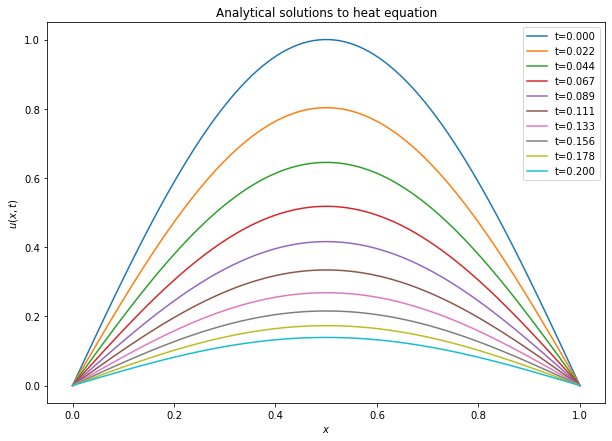

In [25]:
# Specify parameters
x = np.linspace(0,1,100)
c = 1
t = np.linspace(0,0.2,10)

# Plot the solutions
plot_solution(x, t, c)

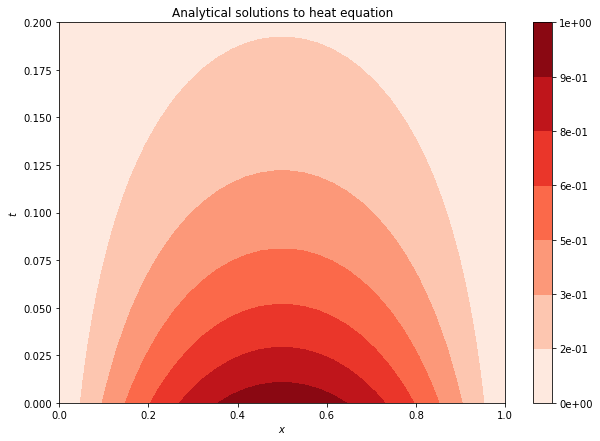

In [26]:
# Create PDE contour plot
x = np.linspace(0,1,32)
c = 1
t = np.linspace(0,0.2,32)
xx, tt = np.meshgrid(x, t)
sol = get_solution(xx, tt, c)
fig, ax = plt.subplots(figsize=(10,7))
cf = ax.contourf(xx, tt, sol, cmap="Reds")
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_title("Analytical solutions to heat equation")
plt.show()